In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/tilemmerichs/Desktop/Insta Basket Analysis'

In [3]:
#Import Dataframe
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Ords_prods_customer_merged.pkl'))

In [4]:
df_dep = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [5]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,STATE,Age,date_joined,children,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
#Creating crosstab
crosstab = pd.crosstab(df_merge['days_since_prior_order'], df_merge['order_number'], dropna = False)

In [7]:
crosstab.to_clipboard()

## Task 2

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

First Name and Surname needs to be deleted because they are PII data. Furthermore '_merge' will be deleted

In [8]:
#Delete Last_Name, Surname and _merge
df_merge=df_merge.drop(columns=['First Name', 'Surname','_merge'])

In [9]:
#Check
df_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,user_behaviour,median_days_since_prior_order,order_frequency,Gender,STATE,Age,date_joined,children,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## Task 3: Create 'region' column with the four regions in USA derived from STATES

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia (https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States) article to create your column (you only need to create regions, not divisions).

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

'Northeast' : 'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'

'Midwest' : 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'

'South' : 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 
'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'

'West' : 'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'

In [10]:
#Creating the region column
df_merge.loc[df_merge['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region']= 'Northeast'

df_merge.loc[df_merge['STATE'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

df_merge.loc[df_merge['STATE'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',  'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

df_merge.loc[df_merge['STATE'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'Region'] = 'West'


In [11]:
#Check 1
df_merge.tail(40)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,order_frequency,Gender,STATE,Age,date_joined,children,fam_status,income,Region
32404819,968657,120516,1,2,9,NaN,8566,1,0,"Almond Butter, Smooth/Unsalted",...,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,West
32404820,1715304,120516,2,4,14,16.0,8566,1,1,"Almond Butter, Smooth/Unsalted",...,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,West
32404821,2830894,120516,3,5,8,22.0,8566,1,1,"Almond Butter, Smooth/Unsalted",...,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,West
32404822,3054027,120516,4,5,8,0.0,8566,1,1,"Almond Butter, Smooth/Unsalted",...,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,West
32404823,392551,120516,5,5,13,30.0,8566,1,1,"Almond Butter, Smooth/Unsalted",...,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,West
32404824,3324220,120516,6,2,16,11.0,40072,1,0,Almond Butter Creamy,...,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,West
32404825,3215764,120516,7,2,9,21.0,40072,1,1,Almond Butter Creamy,...,18.5,Regular customer,Male,Arizona,19,6/14/2019,0,single,76190,West
32404826,1600476,166751,1,5,11,NaN,49001,1,0,Melatonin 2.5 Mg Sublingual Orange Tablets,...,10.0,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West
32404827,1972276,166751,2,4,7,20.0,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,10.0,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West
32404828,1947537,166751,3,4,7,0.0,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,10.0,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West


In [12]:
#Check 2
df_merge['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [13]:
pd.get_option('display.max_columns')

20

In [14]:
pd.set_option('display.max_columns', 35)
df_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,user_behaviour,median_days_since_prior_order,order_frequency,Gender,STATE,Age,date_joined,children,fam_status,income,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [15]:
df_merge.shape

(32404859, 30)

In [16]:
# Creating a spending_habits crosstab

crosstab_spending_habits_region = pd.crosstab(df_merge['Region'], df_merge['user_behaviour'], dropna= False )

In [17]:
crosstab_spending_habits_region

user_behaviour,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


## Task 4: Creating Subset for high-activity customers (>4 orders)

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
#Add the exclusion flag
df_merge.loc[df_merge['max_order'] < 5, 'exclusion_flag'] = 'exclude'

In [19]:
#Replace NaN values with 'not excluded'
df_merge['exclusion_flag'].fillna('active', inplace=True)

In [20]:
#Check
df_merge['exclusion_flag'].value_counts(dropna = False)

active     30964564
exclude     1440295
Name: exclusion_flag, dtype: int64

In [21]:
#Create the Subset
active_customer = df_merge.loc[df_merge['exclusion_flag'] == 'active']

In [22]:
#Check
active_customer['exclusion_flag'].value_counts(dropna = False)

active    30964564
Name: exclusion_flag, dtype: int64

In [23]:
#Check
active_customer

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,user_behaviour,median_days_since_prior_order,order_frequency,Gender,STATE,Age,date_joined,children,fam_status,income,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,active


#Export the subset (system crashing)

active_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 active_customer_subset.pkl'))

## Task 5: Customer Profiling

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

### 5.1 Age

In [24]:
df_merge['Age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

**Result:** The minimum age is 18 and the oldest customers are 81 years old. On average a customer is 49 years old.

- The customers will grouped regarding their age in the following groups
    - 18-39 as 'Youth'
    - 40-64 as 'Middle Age'
    - 65 and older as 'Seniors'

In [25]:
df_merge.loc[df_merge['Age'] < 40, 'age_group'] = 'Youth'
df_merge.loc[df_merge['Age'] > 64, 'age_group'] = 'Seniors'
df_merge.loc[(df_merge['Age'] >= 40) & (df_merge['Age'] <=64), 'age_group'] = 'Middle Age'

In [26]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,user_behaviour,median_days_since_prior_order,order_frequency,Gender,STATE,Age,date_joined,children,fam_status,income,Region,exclusion_flag,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active,Youth
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active,Youth
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active,Youth
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active,Youth
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,active,Youth


### 5.2 Income

In [27]:
df_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [28]:
df_merge.loc[df_merge['income'] < 40000, 'income_class'] = 'Low income'
df_merge.loc[df_merge['income'] > 120000, 'income_class'] = 'High income'
df_merge.loc[(df_merge['income'] >= 40000) & (df_merge['income'] <=80000), 'income_class'] = 'Middle income'
df_merge.loc[(df_merge['income'] > 80000) & (df_merge['income'] <= 120000), 'income_class'] = 'Upper income'

In [29]:
df_merge['income_class'].value_counts(dropna=False)

Upper income     11259688
Middle income     9846873
High income       9571100
Low income        1727198
Name: income_class, dtype: int64

### 5.3 Certain Goods / Products

In [30]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [31]:
# Renaming index column to a clear naem

df_dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace=True)

In [32]:
# Pairing the tupple of {'department_id' , 'department'} with zip() function to create a dictionary

dep_map = dict(zip(df_dep['department_id'], df_dep['department']))

In [33]:
dep_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [34]:
# Mapping customers to department df by the map() function and department dictionary(dep_map)

df_merge['department'] = df_merge['department_id'].map(dep_map)

In [35]:
# Confirming new added column

df_merge.shape

(32404859, 34)

In [36]:
# Distribution of 'department' values in 'cstmrs' dataframe

df_merge['department'].value_counts(dropna=False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

### 5.3.1 Example of further flags, which would crash the system if runned

#Group the merged data by customer ID and department, and count the number of products purchased in each department by each customer
grouped_data = df_merge.groupby(['customer_id', 'department']).agg({'product_id': 'count'}).reset_index()

#Pivot the data to create a matrix of customer IDs vs. departments, with the count of products purchased in each department by each customer as the values
pivoted_data = grouped_data.pivot(index='customer_id', columns='department', values='product_id').fillna(0)

#Create a new column for the flag that indicates whether each customer has purchased a product from the meat department
pivoted_data['meat_flag'] = pivoted_data['meat seafood'] > 0

#Create a new column for the flag that indicates whether each customer has purchased a product from the alcohol department
pivoted_data['alcohol_flag'] = pivoted_data['alcohol'] > 0

#Create a new column for the flag that indicates whether each customer is a vegetarian (i.e. has not purchased any products from the meat department)
pivoted_data['vegetarian_flag'] = pivoted_data['meat and fish'] == 0

## Visualizations

In [37]:
#Customer profile comparison in regions & departments

crosstab_age_day = pd.crosstab(df_merge['age_group'], df_merge['orders_day_of_the_week'], dropna = False)

Text(0.5, 0, 'Age Group')

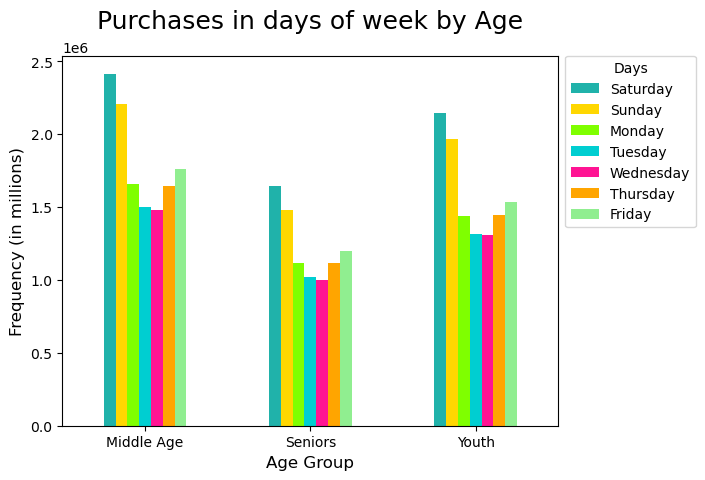

In [38]:
bar_age_day = crosstab_age_day.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'chartreuse', 'darkturquoise', 'deeppink','orange', 'lightgreen'])
bar_age_day.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Purchases in days of week by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)

In [39]:
# Export
bar_age_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','dow_by_age_groups_barchart.png'), bbox_inches = 'tight')

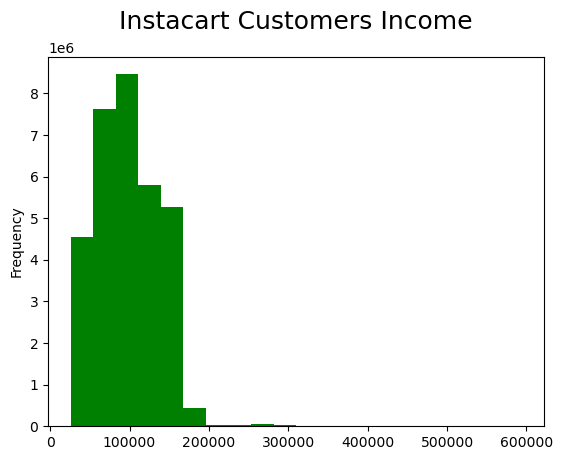

In [40]:
# Create an income histogram
plt.title('Instacart Customers Income', fontsize = 18, pad=20)
hist_inc = df_merge['income'].plot.hist(bins = 20, color = 'green')

In [41]:
# Save histogram
hist_inc.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','income_histogram.png'))

Text(0.5, 1.0, 'Active and Non-Active (<5 Orders) Customers')

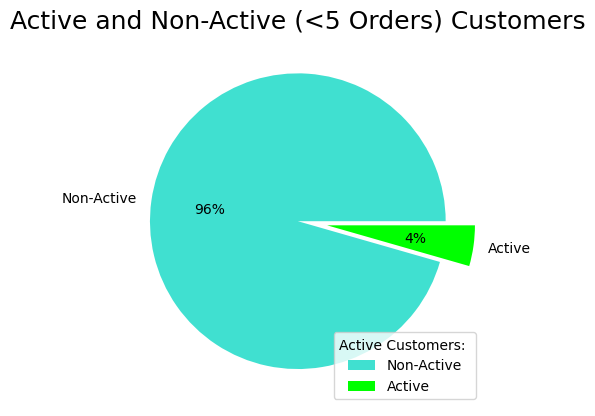

In [42]:
# Drawing a pie chart of Vegetarians

activity = df_merge['exclusion_flag'].value_counts().plot.pie(labels = ['Non-Active','Active'], autopct=('%1.f%%'), colors = ['turquoise','lime'], label = '', explode = [0,0.2])
activity.legend(title = 'Active Customers: ', loc = 'lower right')
plt.title( "Active and Non-Active (<5 Orders) Customers", fontsize= '18')

In [43]:
# Exporting activity chart in .png format

activity.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'active customers'), bbox_inches='tight')

In [44]:
crosstab_income_region = pd.crosstab(df_merge['Region'],df_merge['income_class'], dropna = False)

Text(0.5, 0, 'Region')

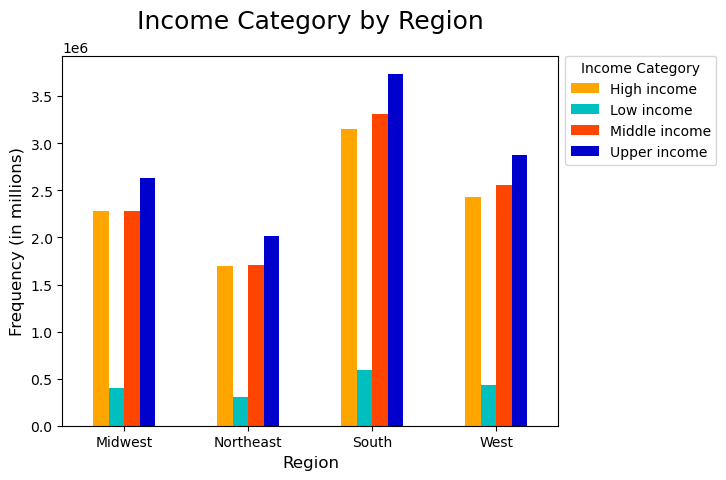

In [45]:
# Drawing a bar chart of income by US regions

bar_inc_reg = crosstab_income_region.plot(kind = 'bar', rot = 0, color= ['orange', 'c', 'orangered', 'mediumblue'])

# The default for bbox_to_anchor is (0,0,1,1), which is a bounding box over the complete axes. If a different bounding box is specified, is is usually sufficient to use the first two values, which give (x0, y0) of the bounding box.
bar_inc_reg.legend(title='Income Category', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Income Category by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [46]:
# Exporting salary per region pie chart in .png format

bar_inc_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'salary per region'), bbox_inches='tight')

Text(0, 0.5, 'Number of Orders')

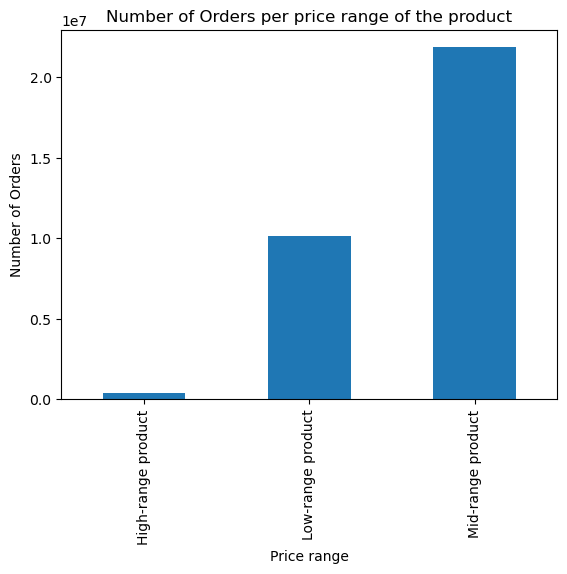

In [50]:
#Creating Bar Charts for orders per price range
bar_price_range = df_merge['price_range'].value_counts().sort_index().plot.bar()
plt.title('Number of Orders per price range of the product')
plt.xlabel('Price range')
plt.ylabel('Number of Orders')

In [51]:
# Exporting orders per price_range in .png format

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders per price range'), bbox_inches='tight')

Text(0, 0.5, 'Number of Orders')

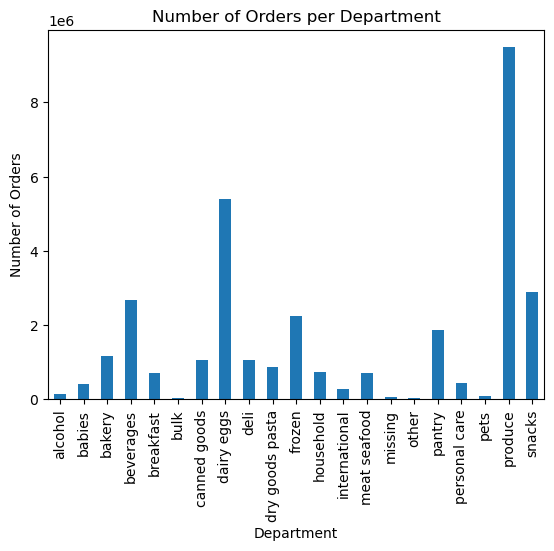

In [52]:
#Creating Bar Charts for orders per department
bar_order_dep = df_merge['department'].value_counts().sort_index().plot.bar()
plt.title('Number of Orders per Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')

In [53]:
# Exporting orders per department in .png format

bar_order_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders per department'), bbox_inches='tight')

Text(0, 0.5, 'Number of Orders')

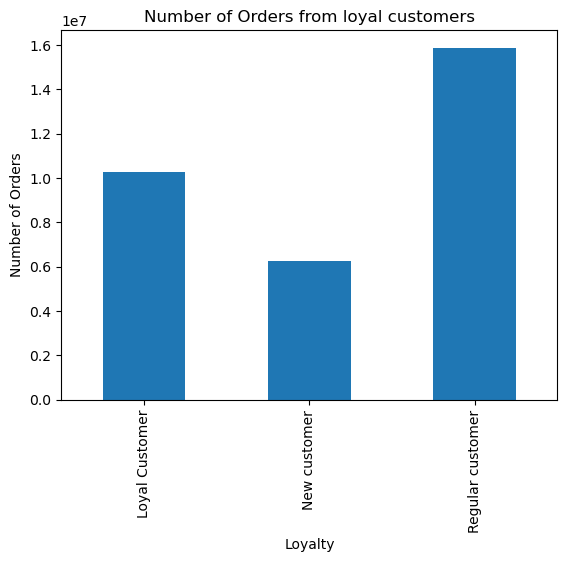

In [54]:
#Creating Bar Charts for orders per loyalty flag
bar_loyalty = df_merge['loyalty_flag'].value_counts().sort_index().plot.bar()
plt.title('Number of Orders from loyal customers')
plt.xlabel('Loyalty')
plt.ylabel('Number of Orders')

In [55]:
# Exporting orders per loyalty_flag in .png format

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_orders'), bbox_inches='tight')

Text(0.5, 0, 'Region')

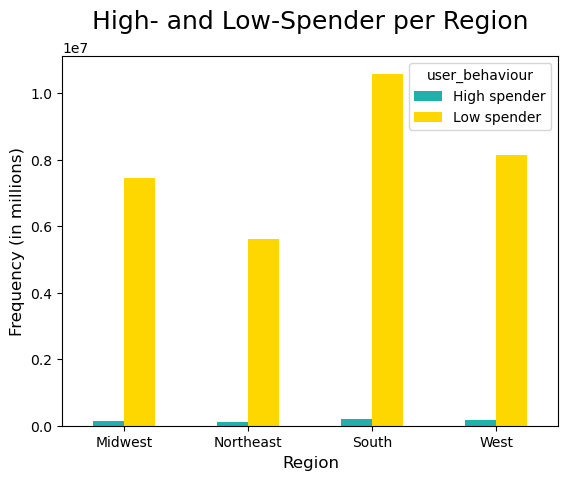

In [57]:


bar_spending_region = crosstab_spending_habits_region.plot(kind = 'bar', rot = 0, color= ['lightseagreen', 'gold', 'chartreuse', 'darkturquoise', 'deeppink','orange', 'lightgreen'])
plt.title('High- and Low-Spender per Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [58]:
# Exporting orders per loyalty_flag in .png format

bar_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending per region'), bbox_inches='tight')

